# Campus placements prediction

Importing all the necessary modules

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error

In [2]:
df=pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Checking the number of null values in the data

In [3]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Dropping serial no. column and the salary column due to the presence of many null values

In [4]:
df.drop('salary',axis=1,inplace=True)
df.drop('sl_no',axis=1,inplace=True)

In [5]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Visualizing the data

Creating a pairplot with respect to placement status.

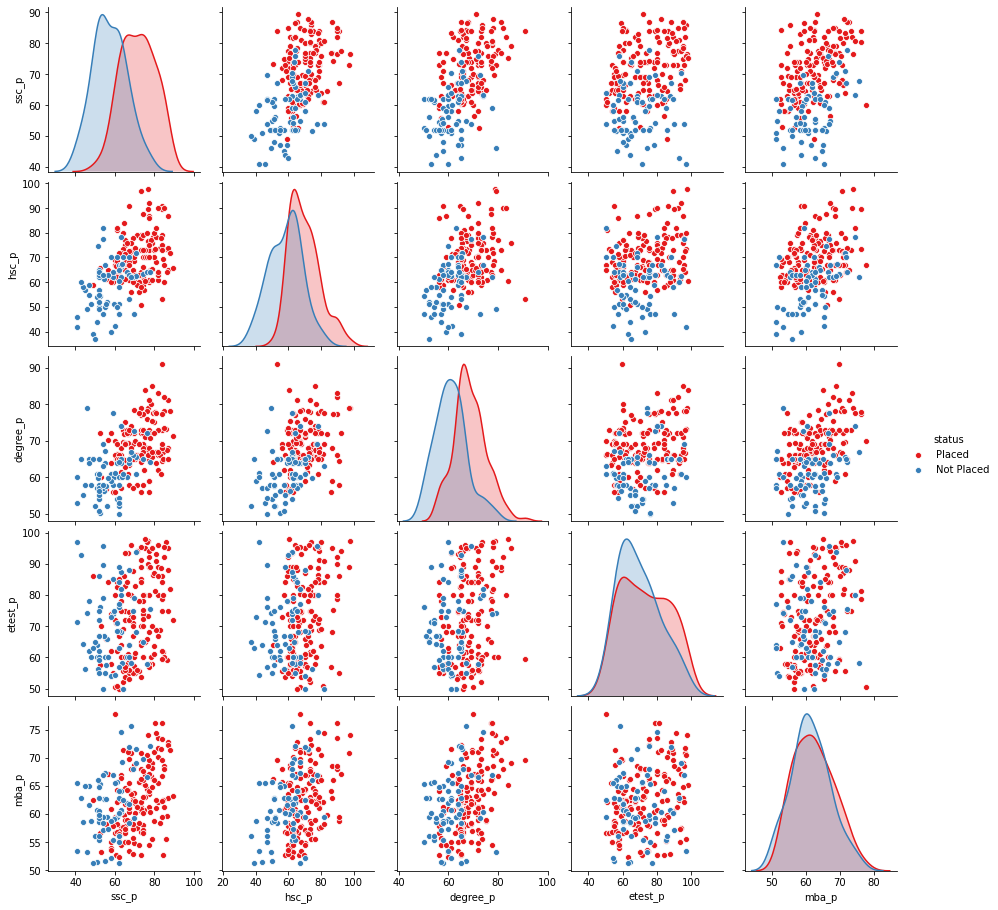

In [6]:
sns.pairplot(data=df,hue='status',palette='Set1')

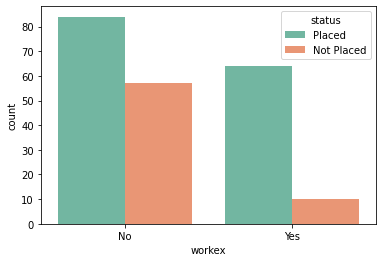

In [7]:
sns.countplot(data=df,x='workex',hue='status',palette='Set2')

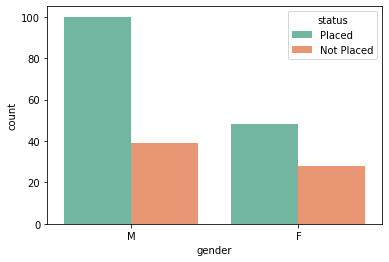

In [8]:
sns.countplot(data=df,x='gender',hue='status',palette='Set2')

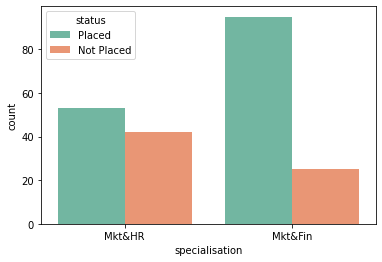

In [9]:
sns.countplot(data=df,x='specialisation',hue='status',palette='Set2')

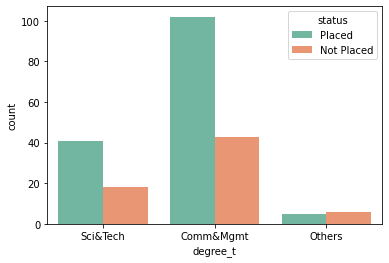

In [10]:
sns.countplot(data=df,x='degree_t',hue='status',palette='Set2')

Plotting various exam percentages

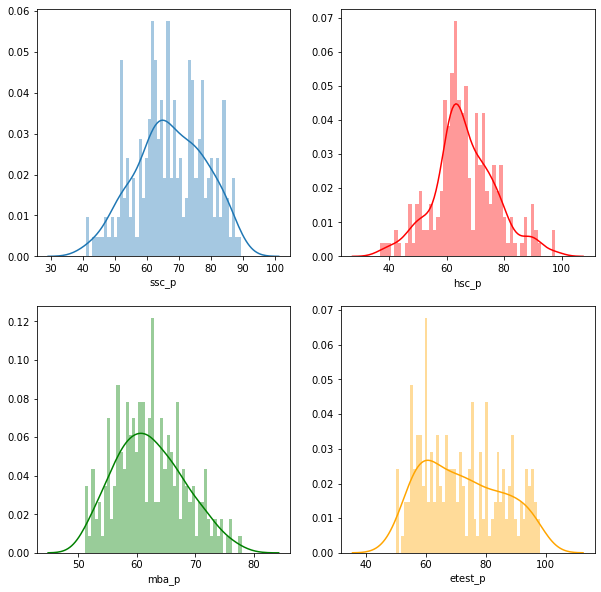

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['ssc_p'],bins=50,)

plt.subplot(2,2,2)
sns.distplot(df['hsc_p'],bins=50,color='red')

plt.subplot(2,2,3)
sns.distplot(df['mba_p'],bins=50,color='green')

plt.subplot(2,2,4)
sns.distplot(df['etest_p'],bins=50,color='orange')

A heatmap to check the correlation among various percentages.

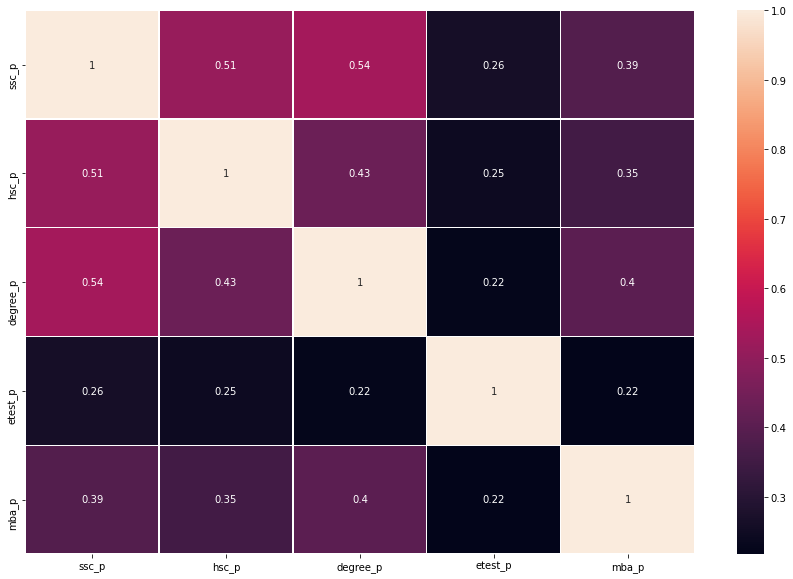

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

Dropping 3 more columns that don't affect the classification

In [13]:
df.drop('hsc_b',axis=1,inplace=True)
df.drop('ssc_b',axis=1,inplace=True)
df.drop('hsc_s',axis=1,inplace=True)

Changing values of different columns from strings or characters to numbers.

In [14]:
d1=pd.get_dummies(df['gender'],drop_first=True)
d2=pd.get_dummies(df['degree_t'],drop_first=True)
d3=pd.get_dummies(df['specialisation'],drop_first=True)
d4=pd.get_dummies(df['workex'],drop_first=True)
df=pd.concat([df,d1,d2,d3,d4],axis=1)
df.drop(['gender','workex','degree_t','specialisation'],axis=1,inplace=True)
labenc=LabelEncoder()
df['status']=labenc.fit_transform(df['status'])

In [15]:
df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,M,Others,Sci&Tech,Mkt&HR,Yes
0,67.00,91.00,58.00,55.0,58.80,1,1,0,1,1,0
1,79.33,78.33,77.48,86.5,66.28,1,1,0,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,1,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0,1,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,0


# Splitting training and testing data

In [16]:
X=df.drop('status',axis=1)
y=df['status']

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

# Scaling the data

In [18]:
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

# Using logistic regression

In [19]:
logreg=LogisticRegression()
logreg.fit(Xtrain,ytrain)
ypred=logreg.predict(Xtest)
print('Accuracy is: {}%'.format(round(accuracy_score(ytest,ypred)*100,2)))

Accuracy is: 90.7%


Difference in predicted and actual y value-plot.

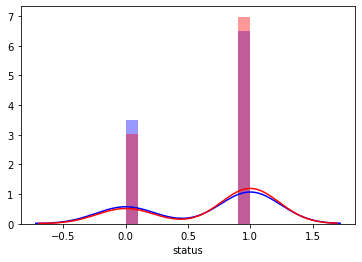

In [20]:
sns.distplot(ytest,bins=10,color='blue')
sns.distplot(ypred,bins=10,color='red')

# Confusion matrix and classification report

In [21]:
print(confusion_matrix(ytest,ypred))

[[12  3]
 [ 1 27]]


In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.90      0.96      0.93        28

    accuracy                           0.91        43
   macro avg       0.91      0.88      0.89        43
weighted avg       0.91      0.91      0.91        43



In [23]:
print(np.sqrt(mean_squared_error(ytest,ypred)))

0.30499714066520933


Thus our model has classified 12+27 values correctly and 3+1 values wrongly with an RMSE score of 0.304
